# Random Forest regressor

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor


from statsmodels.tools.eval_measures import stde




## Read the etl info results

In [2]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,False,False,False,False,False,False


## Read the dataset

In [3]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,SensorTime,CaptureTime,Stage,Discharge,grayMean,graySigma,entropyMean,entropySigma,hMean,hSigma,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,97.405096,39.623303,0.203417,0.979825,105.368375,41.572939,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,104.066757,40.179745,0.206835,1.002624,112.399458,41.795584,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,105.636831,40.533218,0.204756,0.994246,114.021526,42.145582,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,104.418949,41.752678,0.202428,0.983170,112.612830,43.575351,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,106.763541,44.442097,0.202661,0.989625,114.839424,46.302008,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,82.872720,57.702652,0.221708,1.076393,87.260572,61.485334,...,2446,1900,9284.0,77521.0,38385.370066,15952.029728,0.0,70085.0,37550.894823,16444.401209
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,89.028383,55.840861,0.233168,1.124774,94.175906,59.006132,...,2440,1900,10092.0,74614.0,40162.989292,15467.708856,0.0,70061.0,39397.339095,16009.008049
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,94.722097,54.355753,0.240722,1.151833,100.534577,56.921028,...,2447,1900,7067.0,83260.0,42095.946590,16770.357949,0.0,76335.0,41350.006568,17489.374617
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,96.693270,52.787629,0.244789,1.171987,102.891159,55.083532,...,2443,1900,6283.0,83045.0,45345.490954,17498.432849,0.0,78882.0,44553.920296,18268.294896


In [4]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['Year'] = df['SensorTime'].dt.year
df['Month'] = df['SensorTime'].dt.month

In [5]:
df.dtypes

SensorTime          datetime64[ns]
CaptureTime                 object
Stage                      float64
Discharge                  float64
grayMean                   float64
graySigma                  float64
entropyMean                float64
entropySigma               float64
hMean                      float64
hSigma                     float64
sMean                      float64
sSigma                     float64
vMean                      float64
vSigma                     float64
areaFeatCount                int64
grayMean0                  float64
graySigma0                 float64
entropyMean0               float64
entropySigma0              float64
hMean0                     float64
hSigma0                    float64
sMean0                     float64
sSigma0                    float64
vMean0                     float64
vSigma0                    float64
grayMean1                  float64
graySigma1                 float64
entropyMean1               float64
entropySigma1       

In [6]:
df = df[(df.Stage > 0) & (df.Discharge > 0)]

In [7]:
df.isna().sum()

SensorTime          0
CaptureTime         0
Stage               0
Discharge           0
grayMean            0
graySigma           0
entropyMean         0
entropySigma        0
hMean               0
hSigma              0
sMean               0
sSigma              0
vMean               0
vSigma              0
areaFeatCount       0
grayMean0           0
graySigma0          0
entropyMean0        0
entropySigma0       0
hMean0              0
hSigma0             0
sMean0              0
sSigma0             0
vMean0              0
vSigma0             0
grayMean1           0
graySigma1          0
entropyMean1        0
entropySigma1       0
hMean1              0
hSigma1             0
sMean1              0
sSigma1             0
vMean1              0
vSigma1             0
WeirAngle           0
WeirPt1X            0
WeirPt1Y            0
WeirPt2X            0
WeirPt2Y            0
WwRawLineMin        0
WwRawLineMax        0
WwRawLineMean       0
WwRawLineSigma      0
WwCurveLineMin      0
WwCurveLin

## Divide dataset to X and Y

In [8]:
np.random.seed(0)

df_train = df[(df.Year >= 2012) & (df.Year <= 2017)]
df_train = df_train.iloc[np.random.permutation(len(df_train))]

df_test = df[(df.Year >= 2018) & (df.Year <= 2019)]

In [9]:
df_train = df_train.drop(columns=["Year", "SensorTime", "CaptureTime"])
#df_val = df_val.drop(columns=["Year", "SensorTime", "CaptureTime"])
df_test = df_test.drop(columns=["Year", "SensorTime", "CaptureTime"])

In [10]:
y_train = df_train["Stage"]
X_train = df_train.drop(columns=["Stage", "Discharge"])

y_test = df_test["Stage"]
X_test = df_test.drop(columns=["Stage", "Discharge"])

In [11]:
print(X_train.shape)
print(y_train.shape)

(27421, 45)
(27421,)


In [12]:
input_shape = X_train.shape
output_shape = y_train.shape

print(input_shape, output_shape)

(27421, 45) (27421,)


## Train model

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestRegressor(random_state=0))
])

param_grid = {'clf__n_estimators': np.arange(50, 300, 1), 'clf__max_features': ["sqrt", 1.0, "log2"]}

clf = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=40, n_jobs=8, verbose=3, scoring="neg_mean_squared_error")

In [14]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 5/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.075 total time=  27.3s
[CV 3/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.074 total time=  27.5s
[CV 4/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.079 total time=  27.5s
[CV 2/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.076 total time=  28.2s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.073 total time=  28.3s
[CV 2/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.076 total time=  28.7s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.073 total time=  29.9s
[CV 3/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.074 total time=  30.1s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=118;, score=-0.074 total time=  11.1s
[CV 4/5] END clf__max_features=log2, clf__n_estimators=118;, score=-0.079 total time=  10.4s
[CV 2/5]

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=40, n_jobs=8,
                   param_distributions={'clf__max_features': ['sqrt', 1.0,
                                                              'log2'],
                                        'clf__n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90...
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299])},
                   scoring='neg_mean_squared_error', verbose=3)

## Test model

In [15]:
clf.best_score_

-0.0655240231675966

In [16]:
clf.best_params_

{'clf__n_estimators': 177, 'clf__max_features': 1.0}

In [17]:
clf.score(X_test, y_test)

-0.19841446452847838

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("R^2: ", r2_score(y_test, y_pred))
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", mean_squared_error(y_test, y_pred, squared=False))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("mape: ", mean_absolute_percentage_error(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(),
      y_pred.squeeze(), ddof=2))


R^2:  0.4919470624474266
mse:  0.19841446452847838
rmse:  0.4454373856430086
mae:  0.31277947279661256
mape:  0.1214667584681884
Error estandar:  0.3798932957248546


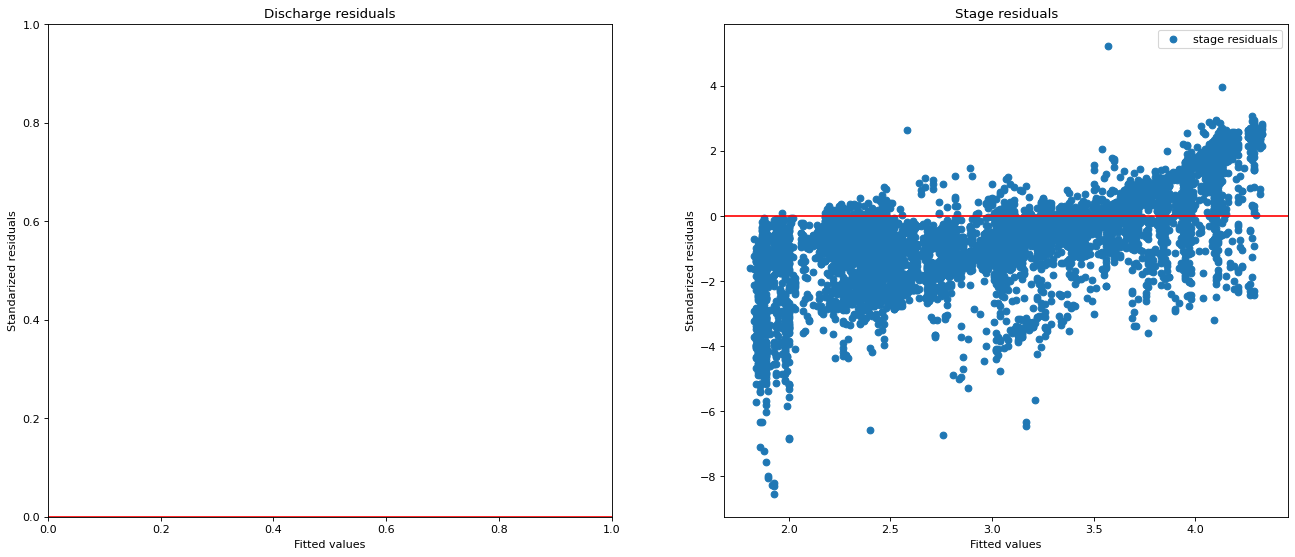

In [20]:
residuals = y_test - y_pred
residuals_std = residuals / residuals.std()

y_real_stage = y_test
residual_stage = residuals

#y_real_discharge = np.array([i[-1] for i in y_test])
#residual_discharge = np.array([i[-1] for i in residuals])


figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[1].scatter(y_real_stage, residual_stage / residual_stage.std(), label="stage residuals")
#ax[0].scatter(y_real_discharge, residual_discharge / residual_discharge.std(), label="discharge residuals")
ax[1].axhline(y=0.0, color='r', linestyle='-')
ax[0].axhline(y=0.0, color='r', linestyle='-')

ax[1].set_title("Stage residuals")
ax[0].set_title("Discharge residuals")

ax[1].set_xlabel("Fitted values")
ax[0].set_xlabel("Fitted values")
ax[1].set_ylabel("Standarized residuals")
ax[0].set_ylabel("Standarized residuals")

plt.legend()
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad

#figure = sm.qqplot(residual_stage / residual_stage.std(), line ='45', label='stage')
plt.show()

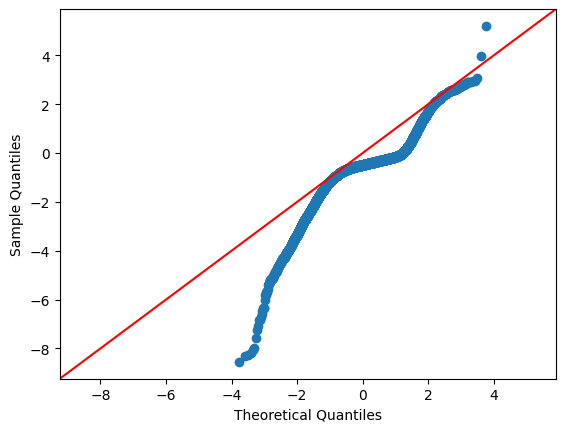

In [22]:
figure = sm.qqplot(residual_stage / residual_stage.std(), line='45', label='discharge')
plt.show()

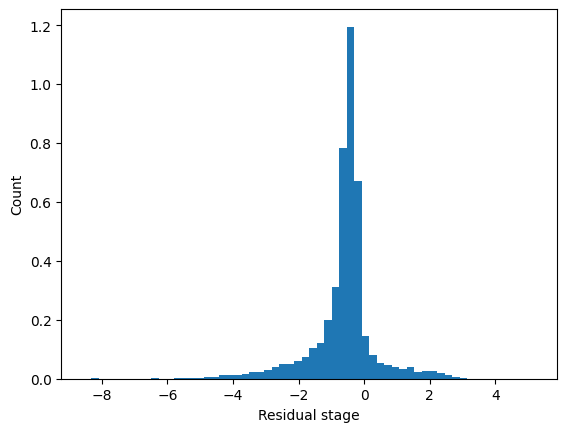

In [23]:
plt.hist(residual_stage / residual_stage.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual stage');
plt.show()

In [24]:
"""plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()"""

"plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)\nplt.ylabel('Count')\nplt.xlabel('Residual discharge');\nplt.show()"

In [25]:
stat, pval = normal_ad(residual_stage / residual_stage.std())
print("p-value:", pval)

if pval < 0.05:
    print("Hay evidencia de que los residuos no provienen de una distribución normal.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos vienen de una distribución normal.")


p-value: 0.0
Hay evidencia de que los residuos no provienen de una distribución normal.


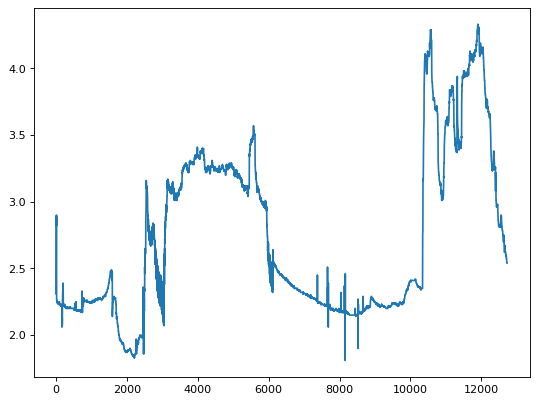

In [26]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(len(y_test)), y_test, label="Stage real")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


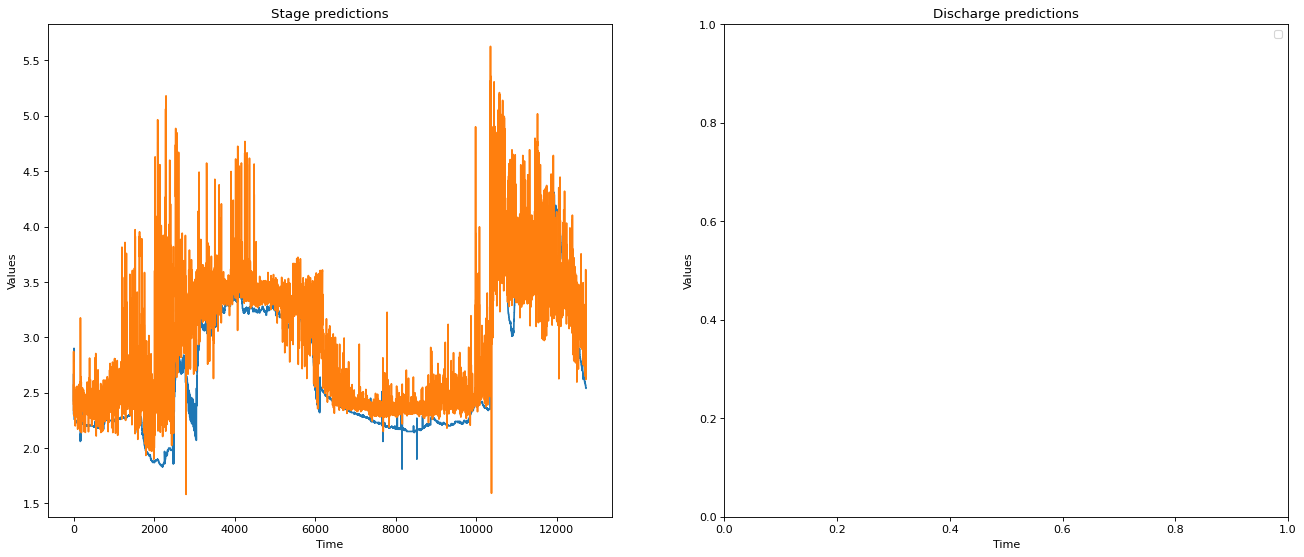

In [27]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[0].plot(np.arange(len(y_test)), y_test, label="Stage real")
ax[0].plot(np.arange(len(y_test)), y_pred, label="Stage pred")

ax[0].set_title("Stage predictions")
ax[1].set_title("Discharge predictions")

ax[1].set_ylabel("Values")
ax[0].set_ylabel("Values")
ax[1].set_xlabel("Time")
ax[0].set_xlabel("Time")

plt.legend()
plt.show()